# Discrete Inverse Problems and Regularisation

In this lecture we consider inverse problems that can be posed as a system of linear equations

$$
Ku = f,
$$

with $K \in \mathbb{R}^{m\times n}$ a given matrix and $f\in \mathbb{R}^{m}$ the data. The goal is to find a solution $u \in \mathbb{R}^n$ that (approximately) satisfies the equations.

## Well-posedness
The first questions we adress in detail are those of *existence*, *uniqueness* and *stability* of the solution. We discern the following cases:

* If $m = n$ and $K$ has full rank, it is invertible and the solution is given by

$$
\widetilde u = K^{-1}f.
$$

* If $m > n$ and $K$ has rank $n$, the system of equations may be *inconsistent* in which case a solution does not exist when $f$ is not in the range of $K$.

* If $m < n$ and $K$ has rank $m$, we can always find a solution but it may not be unique because $K$ has a on-trivial *null-space*.

* If $K$ does not have maximal rank, the system of equations may be both inconsistent and $K$ can have a null-space.

Stability in this context means that errors in the data do not get amplified too much. For now, we'll only consider stability in case the solution exists and is unique. Consider the systems $K\widetilde{u} = f$ and $K\widetilde{u}^{\delta} = f^{\delta}$ for which we have

$$
\|\widetilde u - \widetilde u^{\delta}\| = \|K^{-1}(f - f^{\delta})\| \leq \|K^{-1}\| \|f - f^{\delta}\|,
$$

where $\|u\|$ denotes any [vector norm on $\mathbb{R}^n$](https://en.wikipedia.org/wiki/Real_coordinate_space#Norms_on_Rn) and $\|K\|$ denotes its corresponding (induced) [matrix norm](https://en.wikipedia.org/wiki/Matrix_norm#Matrix_norms_induced_by_vector_norms).

Since $\|f\| = \|K\widetilde u\| \leq \|K\| \|\widetilde u\|$, we can express the *relative error* as

$$
\frac{\|\widetilde u - \widetilde u^{\delta}\|}{\|\widetilde u\|} \leq  \|K\|\|K^{-1}\| \frac{\|f - f^{\delta}\|}{\|f\|}.
$$

The quantity $\kappa(K) = \|K\|\|K^{-1}\|$ is called the [*condition number*](https://en.wikipedia.org/wiki/Condition_number#Matrices) of $K$. When $K$ is invertible, we have $\kappa_2(K) = \|K\|_2\|K^{-1}\|_2 = \sigma_1/\sigma_n$.

## Pseudo inverse

Next, we discuss how we may define solutions to inconsistent or underdetermined systems of equations. For this, we'll use the [singular value decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition) of the matrix $K$.

---

If $m > n$, the system is inconsistent when $f$ is not in the range of $K$. If $K$ has full rank we can express it as

$$
K = U \Sigma V^*,
$$

with $U = (u_1, u_2, \ldots, u_n), V = (v_1, v_2, \ldots, v_n)$ containing the left and right singular vectors and $\Sigma$ is a diagonal matrix containing the singular values $\sigma_1 \geq \sigma_2 \geq \ldots \geq \sigma_{n} > 0$. We can then attempt to solve a modified system of equations

$$
K u =  UU^* f,
$$

where $UU^* f$ projects $f$ onto the range of $K$. We find

$$
\widetilde u = V\Sigma^{-1}U^*f \equiv K^\dagger f,
$$

where $K^\dagger$ denotes the [Moore-Penrose pseudo inverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse) of $K$.

This coincides with the *least-squares* solution

$$
\min_u \|Ku - f\|_2^2 .
$$

Indeed, by setting the gradient to zero, we find the normal equations

$$
K^* K u  = K^* f,
$$

so

$$
\widetilde u = (K^* K)^{-1}K^* f = K^{\dagger}f.
$$

```{admonition} Example: *An overdetermined system of equations*
Consider solving

$$
\left(
\begin{matrix}
1 & 1 \\
2 & 1 \\
1 & 2 \\
\end{matrix}
\right)
\left(
\begin{matrix}
u_1 \\ u_2 \\
\end{matrix}
\right)
= 
\left(
\begin{matrix}
4 \\ 4 \\
\end{matrix}
\right).
$$

The system of equations is obviously not consistent. The corresponding normal equations:

$$
\left(
\begin{matrix}
6 & 4 \\
4 & 6 \\
\end{matrix}
\right)
\left(
\begin{matrix}
u_1 \\ u_2 \\
\end{matrix}
\right)
= 
\left(
\begin{matrix}
4 \\ 4 \\
\end{matrix}
\right)
$$

do have a unique solution, $u = (2/5,2/5)^T$.
```
---

If, on the other hand $m < n$ and $K$ has full rank, a solution exists but is not unique. In this case, we can look for the *smallest* solution (i.e., one that does not have any contributions in the null-space of $K$).  This means we look for a solution that is spanned by the first $m$ columns of $V$, denoted as $V_m = (v_1, v_2, \ldots v_m)$:

$$
K V_m z = f,
$$

with $\widetilde u = V_m z$. We find that this solution is given by

$$
\widetilde{u} = V_m\Sigma_m^{-1}U_m^*f \equiv  K^{\dagger}f,
$$

where $U_m = (u_1, u_2, \ldots u_m)$, $V_m = (v_1, v_2, \ldots v_m)$ and $\Sigma_m$ contains the non-zero singular values $\sigma_1 \geq \sigma_2, \ldots, \sigma_m > 0$. Showing that this indeed yields the solution with the smallest norm is the subject of one of the assignments. The corresponding variational problem is

$$
\min_{u} \|u\|_2^2 \quad \text{such that} \quad Ku = f.
$$

```{admonition} Example: *An underdetermined system of equations*

Consider solving

$$
\left(
\begin{matrix}
1 & 1 \\
\end{matrix}
\right)
\left(
\begin{matrix}
u_1 \\ u_2
\end{matrix}
\right)
= 
\left(
\begin{matrix}
1 \\
\end{matrix}
\right).
$$

The corresponding normal equations are given by $2v = 1$, and gives the solution $u = v (1,1)^T$. In effect this means that we have added an equation to the system: $u_1 - u_2 = 0$.
```
---

If the matrix does not have full rank we may still employ the pseudo-inverse, which for a matrix of rank $k \leq \min\{m,n\}$ is defined as follows.

```{admonition} Definition: *Moore-Penrose pseudo inverse*
:class: important

The pseudo-inverse of a matrix $K \in \mathbb{R}^{m,n}$ with rank $k \leq \min\{m,n\}$ is defined in terms of the singular value decomposition as

$$
K^{\dagger} = V_k\Sigma_k^{-1}U_k^{*},
$$

where $V_k = (v_1, v_2, \ldots, v_k)$, $U_k = (u_1, u_2, \ldots, u_k)$ and $\Sigma_k$ contains the $k$ largest singular values.
```
---

Note that the pseudo inverse allows us to define a unique solution, it is not necessarily stable as $\|K\|_2\|K^{\dagger}\|_2 = \sigma_1/\sigma_k$ may still be large. To study this issue in more detail, express the solution as
 
$$
\widetilde{u} = V_k\Sigma_k^{-1}U_k^{*}f = \sum_{i=1}^k \frac{\langle u_i, f\rangle}{\sigma_i}v_i.
$$

We note the component in $f$ corresponding to $v_i$ is amplified by $\sigma_i^{-1}$. Thus if $f$ has (noise) components that correlate with $v_i$'s corresponding to very small singular values, these noise components get amplified. Generally, we do not expect problems if $|\langle u_i, f\rangle|$ decays faster with $i$ than the singular values $\sigma_i$. This is called the *discrete Picard condition* {cite}`hansen1990discrete`.

```{admonition} Definition: *Discrete Picard Condition*
:class: important

The vector $f \in \mathbb{R}^m$ satisfies the discrete Picard condition for the problem $Ku=f$ if the coefficients $|\langle u_i, f\rangle|$ decay faster than the singular values $\sigma_i$ of $K$, where $u_i$ denotes the left singular vectors of $K$.
```

An example is shown below.

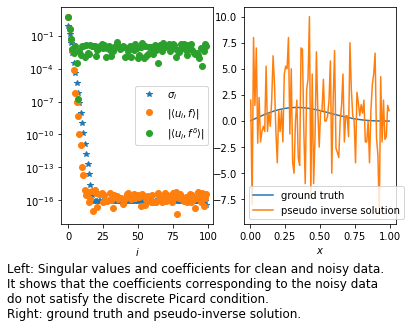

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# define forward operator
def getK(n):
    h = 1/n;
    x = np.linspace(h/2,1-h/2,n)
    xx,yy = np.meshgrid(x,x)
    K = h/(1 + (xx - yy)**2)**(3/2)
    
    return K,x

# parameters
n = 100
delta = 1e-2
K,x = getK(n)

# define ground truth and compute data
u = np.sin(np.pi*x) + 0.5*np.sin(2*np.pi*x)
f = K@u

# add noise
noise = np.random.randn(n)
f_delta = f + delta*noise

# SVD
U, sigma, Vh = np.linalg.svd(K, full_matrices=True)

# apply pseudo inverse
uhat = Vh.T@np.diag(1/sigma)@U.T@f

# plot
fig, ax = plt.subplots(1,2)

ax[0].semilogy(sigma,'*',label=r'$\sigma_i$')
ax[0].semilogy(np.abs(U.T@f),'o',label=r'$|\langle u_i, f\rangle|$')
ax[0].semilogy(np.abs(U.T@f_delta),'o',label=r'$|\langle u_i, f^{\delta}\rangle|$')
ax[0].set_xlabel(r'$i$')
ax[0].legend()

ax[1].plot(x,u,label='ground truth')
ax[1].plot(x,uhat,label='pseudo inverse solution')
ax[1].set_xlabel(r'$x$')
ax[1].legend()

plt.figtext(0,-0.2,"Left: Singular values and coefficients for clean and noisy data.\nIt shows that the coefficients corresponding to the noisy data\ndo not satisfy the discrete Picard condition.\nRight: ground truth and pseudo-inverse solution.",{"fontsize":12})
plt.show()

## Regularisation

To stabilize the problem we can modify the pseudo inverse in several ways to avoid dividing by small singular values. One option is to simply ignore small singular values and choose a cut-off value and define the solution as

```{math}
:label: regK
\widetilde u_{\alpha} = V_{k}r_{\alpha}(\Sigma_{k}){U_{k}}^*f,
```

where $r$ computes the regularized inverse:

$$
r_{\alpha}(\sigma) =
\left\{
\begin{array}{ccc}
\sigma^{-1} & \text{if} \quad \sigma \geq \alpha \\
0 & \text{otherwise} \\
\end{array}
\right.
$$

This gives rise to the Truncated Singular Value Decomposition (TSVD).

```{admonition} Definition: *Truncated Singular Value Decomposition (TSVD)*
:class: important

The TSVD-regularized solution to the equation $Ku = f$ is given by


$$
\widetilde u_{\alpha} = \sum_{i=1}^{k_{\alpha}} \frac{\langle u_i, f\rangle}{\sigma_i}v_i,
$$

where $\{(u_i,v_i,\sigma_i)\}_{i=1}^n$ denotes the singular system of $K$ and $k_{\alpha}$ is chosen so that $\sigma_i \geq \alpha$ for $i \leq k_{\alpha}$. 
```

---

Another option to avoid dividing by small singular values is to add small positive constant to shift the singular values away from zero. This gives rise to Tikhonov regularisation.

```{admonition} Definition: *Tikhonov regularisation*
:class: important

The Tikhonov-regularised solution to the equation $Ku = f$ is given by

$$
\widetilde u_{\alpha} = \sum_{i=1}^{n} \sigma_i \frac{\langle u_i, f\rangle}{\sigma_i^2 + \alpha}v_i,
$$

where $\{(u_i,v_i,\sigma_i)\}_{i=1}^n$ is the singular system of $K$. This corresponds to setting $r_{\alpha}(s) = s/(s^2 + \alpha)$ in {eq}`regK`.

Unlike the TSVD, Tikhonov regularization has a corresponding variational problem:

$$
\min_u \|Ku - f\|_2^2 + \alpha \|u\|_2^2,
$$

whose well-posedness can be easily established by writing down the corresponding normal equations

$$
\widetilde{u}_{\alpha} = \left(K^* K + \alpha I\right)^{-1}K^* f = V_k\left(\Sigma_k^2 + \alpha I\right)^{-1}\Sigma_k {U_k}^*f.
$$

Indeed, it is easily verified that $K^* K + \alpha I$ has full rank whenever $\alpha > 0$.
```

---

Of course, one may think of other types of regularization by defining an appropriate function $r_{\alpha}$. Intiutively, we would like

* $r_{\alpha}(s) = s^{-1}$ as $\alpha \rightarrow 0$
* $r_{\alpha}(0) < \infty$ for any $\alpha > 0$
* $r_{\alpha}(s) \rightarrow 0$ as $\alpha \rightarrow \infty$

One example is *Lavrentiev* regularization, with:

$$r_{\alpha}(s) = (s + \alpha)^{-1}.$$

Conditions on regularization schemes and methods for choosing $\alpha$ will be discussed in more detail in the chapter on [Inverse Problems in Function Spaces](./ip_function_spaces).

---

In general, we can think of regularization for linear problems as defining a modified pseudo-inverse of $K$:

$$K_{\alpha}^{\dagger} = V_{k}r_{\alpha}(\Sigma_{k})U_{k}^{*}.$$

Stability of regularized solutions defined by {eq}`regK` then follows by considering the largest singular value of $K_{\alpha}^\dagger$, which can be made arbitrarily small by increasing $\alpha$. On the other hand, increasing $\alpha$ will also introduce a bias in the solution. This trade-off is called the *bias-variance trade-off*:

```{admonition} Definition: *Bias-variance trade-off*
:class: important

Here, we compare the regularized solution from noisy data $\widetilde{u}_{\alpha, \delta} = K_{\alpha}^\dagger f^{\delta}$ and the ideal solution $\widetilde{u} = K^{\dagger}f$:

$$
\|\widetilde u - \widetilde u_{\alpha, \delta}\| \leq \underbrace{\|(K^\dagger - K_{\alpha}^\dagger)f\|}_{\text{bias}} + \underbrace{\|K_{\alpha}^\dagger(f - f^{\delta})\|}_{\text{variance}}.
$$

If $\alpha \downarrow 0$, the bias goes to zero, but possibly leads to a large variance. Large $\alpha$ on the other hand reduces the variance but leads to a large bias. Ideally, the regularization parameter is chosen in such a way that the small singular values are stabilized and the large ones are hardly effected.
```

## Exercises

### Pseudo-inverse

Show that for a given matrix $K \in \mathbb{R}^{m\times n}$:

1. $KK^\dagger$ is an orthogonal projection on to the range of $K$
2. $I - K^\dagger K$ is an orthogonal projection to to the null-space of $K$

### Least-squares and minimum-norm solutions:
Given a system of equations $Ku = f$ with $K\in\mathbb{R}^{m\times n}$:

1. For $m > n$ and rank($K$) = $n$, show that the pseudo-inverse gives the solution $u = K^\dagger f$ with the smallest residual $\|Ku - f\|_2$

2. For $m < n$ and rank($K$) = $m$, show that the pseudo-inverse gives the solution $u = K^\dagger f$ with the smallest norm $\|u\|_2$

3. For $m > n$ and rank($K$) = $r < n$, show that the pseudo-inverse gives the solution that minimizes both $\|Ku - f\|_2$ and $\|u\|_2$.

### Tikhonov regularisation

Show that the solution to the variational problem

$$\min_{u} \|Ku - f\|_2^2 + \alpha \|u\|_2^2$$

is given in terms of the SVD of $K \in \mathbb{R}^{m\times n}$ as 

$$\widetilde{u} = \sum_{i=1}^{\min\{m,n\}} \frac{\sigma_i \langle u_i,f\rangle}{\sigma_i^2 + \alpha} v_i.$$

### Gravity surveying

We can estimate the density distribution in the subsurface by measuing the local gravitational pull. The density profile $u(x)$ is related to such measurements by a linear operator

$$Ku(x) = \int_0^1 \frac{u(y)}{(1 + (x-y)^2)^{3/2}} \mathrm{d}y.$$

Upon discretization with stepsize $h = 1/n$, the inverse problem can be cast as a system of $n$ equations in $n$ unknowns $Ku = f$.

1. Use the code provided below to generate the matrix and compute its SVD (use `np.linalg.svd`)
3. Plot the coefficients $\langle u_i, f\rangle$ and the singular values $\sigma_i$ to check the discrete Picard condition. What do you notice ?

2. Solve the inverse problem for noisy data using the (regularized) pseudo-inverse; compute the optimal $\alpha$ by computing the bias and variance components of the error.


In [1]:
def getK(n):
    h = 1/n;
    x = np.linspace(h/2,1-h/2,n)
    xx,yy = np.meshgrid(x,x)
    K = h/(1 + (xx - yy)**2)**(3/2)
    
    return K,x

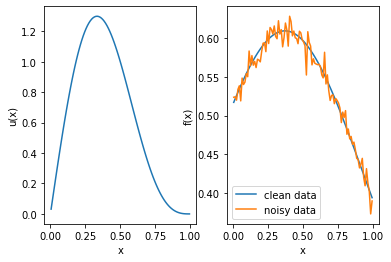

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# define forward operator
n = 100
delta = 1e-2
K,x = getK(n)

# define ground truth and compute data
u = np.sin(np.pi*x) + 0.5*np.sin(2*np.pi*x)
f = K@u

# add noise
noise = np.random.randn(n)
f_delta = f + delta*noise

# plot ground truth and data
fig, axs = plt.subplots(1,2)

axs[0].plot(x,u)
axs[0].set_xlabel('x')
axs[0].set_ylabel('u(x)')

axs[1].plot(x,f,label='clean data')
axs[1].plot(x,f_delta,label='noisy data')

axs[1].set_xlabel('x')
axs[1].set_ylabel('f(x)')
axs[1].legend()

plt.show()

### Convolution

We are going to solve a deconvolution problem $Ku = f$, where $K$ is a *Toeplitz matrix* with elements

$$k_{ij} = \frac{\exp({-a\cdot (i-j)^2})}{(n-1)\sqrt{\pi/a}},$$ 

and we are given noisy measurements 

$$f^{\delta} = Ku + e,$$

where the entries of $e$ are normally distrubuted with mean zero and variance $\delta^2$.

The goal of this assignment is to solve this inverse problem using a (truncated) SVD for two scenario's

1. $u(x) = H(x - 0.3) - H(x - 0.7)$ 
2. $u(x) = x(1-x)$

For each of the two scenarios answer the following questions:

1. Is this problem ill-posed?
2. Compute the (pseudo-)inverse of $K$ using the SVD and compute the backward error $|u - u^{\delta}|_2$ for noise levels $\delta = 0.001, 0.01, 0.1$ for both scenario's; what do you notice?
3. Compute a regularized solution using a truncated SVD for noise levels $\delta = 0.001, 0.01, 0.1$ for both scenario's. Manually choose the truncation paramater $k$ in each case to get the best possible solution. What do you notice here?
4. Explain your observations by investigating what the singular vectors look like (think about the discrete Picard condition as well).

In [ ]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

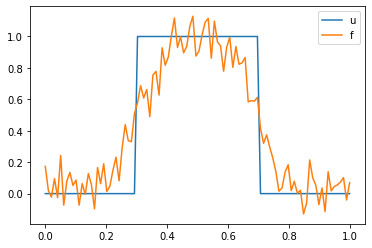

In [9]:
# parameters and grid
n = 100
a = 100
delta = 1e-1
x = np.linspace(0,1,n)

# define forward operator
c = np.exp(-a*x**2)/((n-1)*np.sqrt(np.pi/a))
K = la.toeplitz(c)

# ground truth and data
u = abs(x - 0.5)<.2
f = K@u + delta*np.random.randn(n)

# plot
plt.plot(x,u,label='u')
plt.plot(x,f,label='f')
plt.legend()
plt.show()

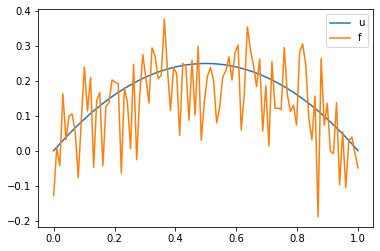

In [11]:
# parameters and grid
n = 100
a = 100
delta = 1e-1
x = np.linspace(0,1,n)

# define forward operator
c = np.exp(-a*x**2)/((n-1)*np.sqrt(np.pi/a))
K = la.toeplitz(c)

# ground truth and data
u = x*(1-x)
f = K@u + delta*np.random.randn(n)

# plot
plt.plot(x,u,label='u')
plt.plot(x,f,label='f')
plt.legend()
plt.show()

## References

```{bibliography} references.bib
:style: plain
:filter: docname in docnames
```